# Exercise: EDA of Time Series

Let's practice our EDA skills with another type of data! In this exercise, we will prepare and analyze a MRT3 passenger dataset.

Using this dataset, you need to wrangle the data to come up with visualizations to know more about the passenger trends and patterns across the whole MRT3 system.

What questions would you like to answer with the available dataset?

**IMPORTANT:** Copy this notebook and make changes in that copy. Do not push changes to this notebook.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

from pathlib import Path

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
DSDATA = Path(os.getenv('DSDATA'))

In [3]:
df = pd.read_csv(DSDATA / '2013_mrt_hourly_daily_ridership_tidy.csv')
df.head(5)

,month,dow,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,January,2,1,03:00 - 03:59,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,January,2,1,04:00 - 04:59,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,January,2,1,05:00 - 05:59,367,94,127,57,113,21,...,124,56,40,38,100,123,70,84,359,192
3,January,2,1,06:00 - 06:59,533,610,327,247,210,113,...,352,278,181,191,379,404,307,256,762,820
4,January,2,1,07:00 - 07:59,678,800,373,426,209,209,...,462,364,256,143,458,366,378,290,1079,1174


In [4]:
def getFirstHour(time):
    return time[0:2]

In [5]:
df["time"] = df["time"].map(getFirstHour)

In [6]:
df.head()

,month,dow,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,January,2,1,03,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,January,2,1,04,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,January,2,1,05,367,94,127,57,113,21,...,124,56,40,38,100,123,70,84,359,192
3,January,2,1,06,533,610,327,247,210,113,...,352,278,181,191,379,404,307,256,762,820
4,January,2,1,07,678,800,373,426,209,209,...,462,364,256,143,458,366,378,290,1079,1174


In [7]:
def removeDashes(value):
    result = re.sub(r"-", "0", value)
    result = result.strip()
    return result

In [9]:
df[["time", "north_avenue_entry", "north_avenue_exit", 
    "quezon_avenue_entry", "quezon_avenue_exit", 
    "gma_kamuning_entry", "gma_kamuning_exit", 
    "cubao_entry", "cubao_exit", 
    "santolan_entry", "santolan_exit", 
    "ortigas_entry", "ortigas_exit", 
    "shaw_blvd_entry", "shaw_blvd_exit", 
    "boni_avenue_entry", "boni_avenue_exit", 
    "guadalupe_entry", "guadalupe_exit", 
    "buendia_entry", "buendia_exit", 
    "ayala_avenue_entry", "ayala_avenue_exit", 
    "magallanes_entry", "magallanes_exit", 
    "taft_entry", "taft_exit"]] = df[["time", "north_avenue_entry", "north_avenue_exit", 
    "quezon_avenue_entry", "quezon_avenue_exit", 
    "gma_kamuning_entry", "gma_kamuning_exit", 
    "cubao_entry", "cubao_exit", 
    "santolan_entry", "santolan_exit", 
    "ortigas_entry", "ortigas_exit", 
    "shaw_blvd_entry", "shaw_blvd_exit", 
    "boni_avenue_entry", "boni_avenue_exit", 
    "guadalupe_entry", "guadalupe_exit", 
    "buendia_entry", "buendia_exit", 
    "ayala_avenue_entry", "ayala_avenue_exit", 
    "magallanes_entry", "magallanes_exit", 
    "taft_entry", "taft_exit"]].applymap(removeDashes)

In [10]:
df[["dow", "time", "north_avenue_entry", "north_avenue_exit", 
    "quezon_avenue_entry", "quezon_avenue_exit", 
    "gma_kamuning_entry", "gma_kamuning_exit", 
    "cubao_entry", "cubao_exit", 
    "santolan_entry", "santolan_exit", 
    "ortigas_entry", "ortigas_exit", 
    "shaw_blvd_entry", "shaw_blvd_exit", 
    "boni_avenue_entry", "boni_avenue_exit", 
    "guadalupe_entry", "guadalupe_exit", 
    "buendia_entry", "buendia_exit", 
    "ayala_avenue_entry", "ayala_avenue_exit", 
    "magallanes_entry", "magallanes_exit", 
    "taft_entry", "taft_exit"]] = df[["dow", "time", "north_avenue_entry", "north_avenue_exit", 
    "quezon_avenue_entry", "quezon_avenue_exit", 
    "gma_kamuning_entry", "gma_kamuning_exit", 
    "cubao_entry", "cubao_exit", 
    "santolan_entry", "santolan_exit", 
    "ortigas_entry", "ortigas_exit", 
    "shaw_blvd_entry", "shaw_blvd_exit", 
    "boni_avenue_entry", "boni_avenue_exit", 
    "guadalupe_entry", "guadalupe_exit", 
    "buendia_entry", "buendia_exit", 
    "ayala_avenue_entry", "ayala_avenue_exit", 
    "magallanes_entry", "magallanes_exit", 
    "taft_entry", "taft_exit"]].applymap(pd.to_numeric)


In [11]:
def convertMonthToNum(month):
    dt = datetime.datetime.strptime(month, "%B")
    return dt.month

In [12]:
df["month"] = df["month"].map(convertMonthToNum)

In [13]:
df.describe()

,month,dow,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,3.994521,15.720548,11.500000,3251.288584,2191.639954,1447.869406,1525.584018,831.943950,625.038128,...,1440.768493,1391.035274,674.520776,790.007306,1648.371575,1971.575342,1408.229680,1030.165639,3321.425913,3027.424087
std,3.448048,2.000107,8.796749,6.922582,2940.477189,2005.089049,1222.810864,1320.966882,664.295373,514.185880,...,1082.055418,1050.328269,761.761083,928.635335,1653.283126,1790.117664,1293.345218,1051.286395,2550.732800,2257.189573
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,8.000000,5.750000,49.000000,117.000000,62.000000,26.000000,47.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,16.000000,11.500000,3246.000000,2102.000000,1520.000000,1490.000000,871.000000,617.000000,...,1681.000000,1631.000000,478.500000,566.000000,1332.500000,1846.500000,1396.000000,886.000000,3718.000000,3576.000000
75%,10.000000,6.000000,23.000000,17.250000,4290.000000,2946.500000,2173.250000,2271.250000,1357.000000,984.000000,...,2231.250000,2102.000000,872.250000,1093.000000,2260.250000,2992.250000,2018.250000,1382.000000,5057.000000,4662.250000
max,12.000000,7.000000,31.000000,23.000000,13731.000000,10265.000000,5865.000000,6110.000000,3102.000000,2035.000000,...,5150.000000,6095.000000,5104.000000,8630.000000,9264.000000,10955.000000,6142.000000,6065.000000,9500.000000,9182.000000


In [14]:
df_tidy = df.melt(id_vars=["dow", "month", "day", "time"], value_vars=["north_avenue_entry", "north_avenue_exit", 
    "quezon_avenue_entry", "quezon_avenue_exit", 
    "gma_kamuning_entry", "gma_kamuning_exit", 
    "cubao_entry", "cubao_exit", 
    "santolan_entry", "santolan_exit", 
    "ortigas_entry", "ortigas_exit", 
    "shaw_blvd_entry", "shaw_blvd_exit", 
    "boni_avenue_entry", "boni_avenue_exit", 
    "guadalupe_entry", "guadalupe_exit", 
    "buendia_entry", "buendia_exit", 
    "ayala_avenue_entry", "ayala_avenue_exit", 
    "magallanes_entry", "magallanes_exit", 
    "taft_entry", "taft_exit"], var_name="station", value_name="count")

df_tidy.head(30)

,dow,month,day,time,station,count
0,2,1,1,3,north_avenue_entry,0
1,2,1,1,4,north_avenue_entry,0
2,2,1,1,5,north_avenue_entry,367
3,2,1,1,6,north_avenue_entry,533
4,2,1,1,7,north_avenue_entry,678
5,2,1,1,8,north_avenue_entry,759
6,2,1,1,9,north_avenue_entry,1089
7,2,1,1,10,north_avenue_entry,1972
8,2,1,1,11,north_avenue_entry,2513
9,2,1,1,12,north_avenue_entry,2064


In [15]:
def cleanStationNames(station_name):
    if re.search(r"_entry", station_name):
        pos = re.search(r"_entry", station_name).start()
        return station_name[pos+1:], station_name[:pos]
    elif re.search(r"_exit", station_name):
        pos = re.search(r"_exit", station_name).start()
        return station_name[pos+1:], station_name[:pos]
    else:
        return station_name, station_name

In [16]:
df_tidy["gate"], df_tidy["station"] = zip(*df_tidy["station"].apply(cleanStationNames))

   ### EDA

In [17]:
monthly = df_tidy.groupby(["station", "month", "gate"], as_index=False)["count"].sum()
monthly["count"] = monthly["count"]/1000000
monthly.head()

,station,month,gate,count
0,ayala_avenue,1,entry,1.233429
1,ayala_avenue,1,exit,1.481022
2,ayala_avenue,2,entry,1.153228
3,ayala_avenue,2,exit,1.292383
4,ayala_avenue,3,entry,1.076803


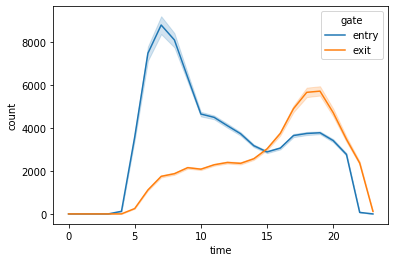

In [18]:
northave_plot = sns.lineplot(data=df_tidy[df_tidy["station"] == "north_avenue"], x="time", y="count", hue="gate")

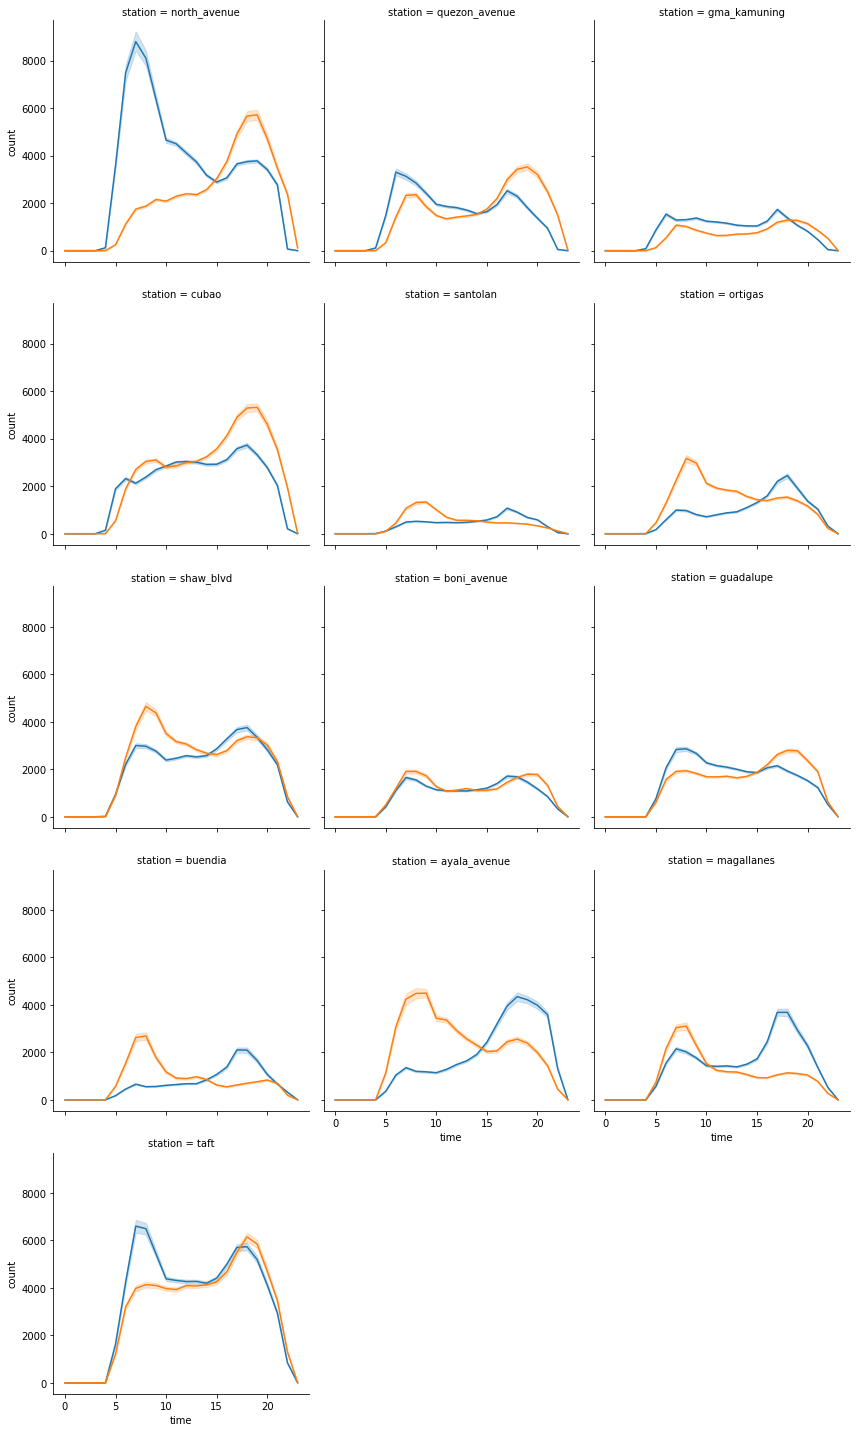

In [19]:
stations_plot = sns.FacetGrid(data=df_tidy, col="station", col_wrap=3, height=4, hue="gate")
stations_plot.map(sns.lineplot, "time", "count")

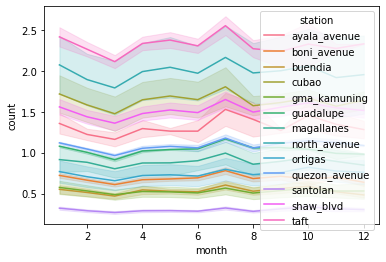

In [20]:
annual_plot = sns.lineplot(data=monthly, x="month", y="count", hue="station")

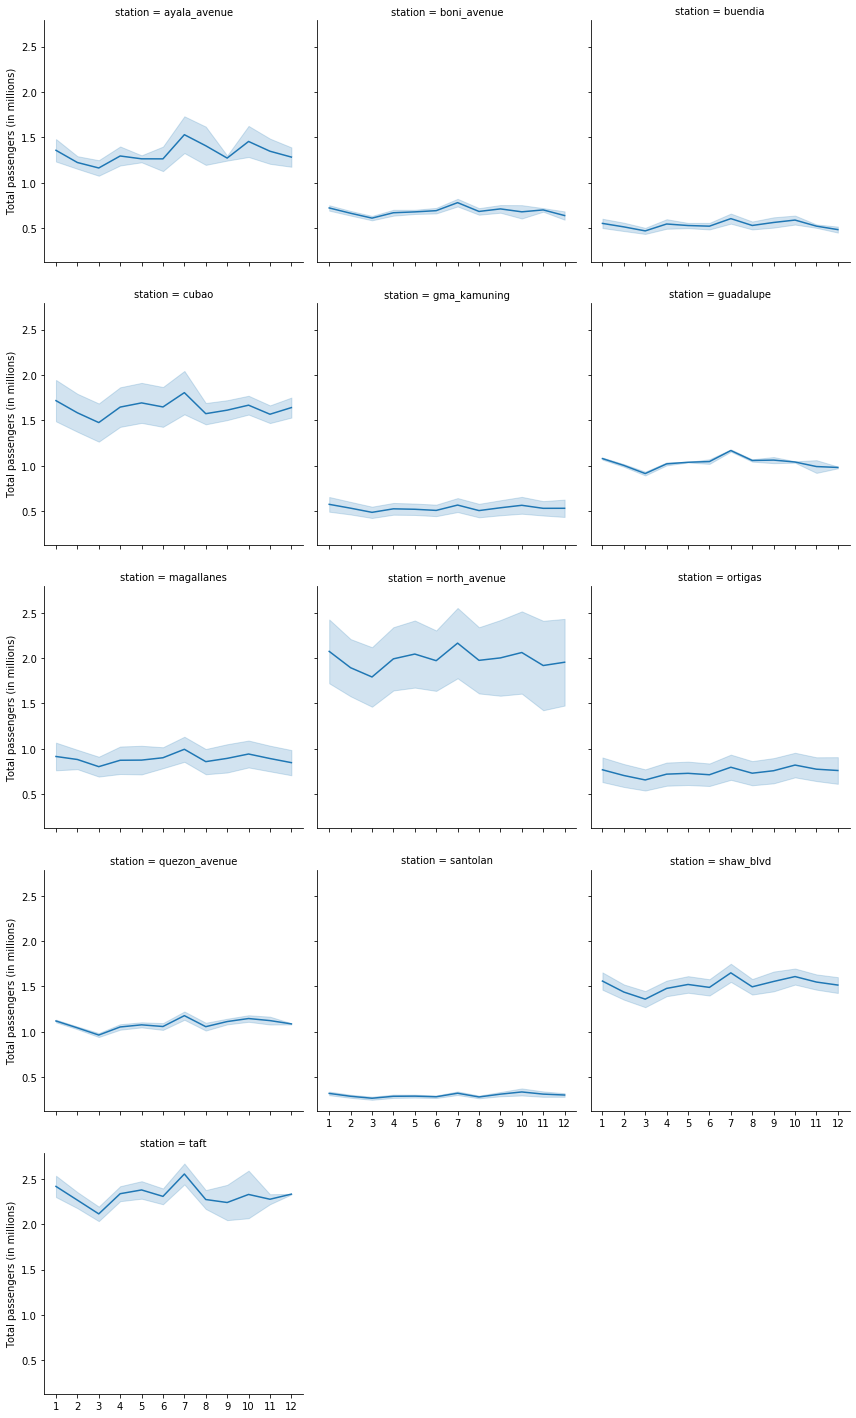

In [21]:
annual_plot = sns.FacetGrid(monthly, col="station", col_wrap=3, height=4)
annual_plot.map(sns.lineplot, "month", "count")
annual_plot.set(xticks=range(1, 13, 1))
annual_plot.set_axis_labels("", "Total passengers (in millions)")

[Text(0, 0.5, ''), Text(0.5, 0, 'Total passengers (in millions)')]

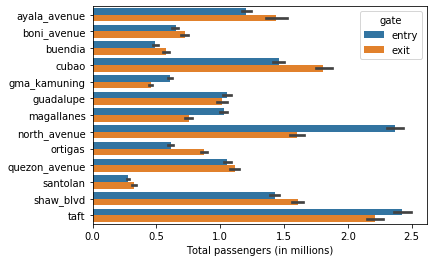

In [22]:
plot = sns.barplot(data=monthly, x="count", y="station", hue="gate")
plot.set(xlabel="Total passengers (in millions)", ylabel="")

In [23]:
def createDate(year, month, day):
    dttemp = datetime.datetime(year=year, month=month, day=day)
    return dttemp

In [24]:
df_tidy["date"] = df_tidy.apply(lambda x: createDate(2013, x.month, x.day), axis=1)
df_tidy

,dow,month,day,time,station,count,gate,date
0,2,1,1,3,north_avenue,0,entry,2013-01-01
1,2,1,1,4,north_avenue,0,entry,2013-01-01
2,2,1,1,5,north_avenue,367,entry,2013-01-01
3,2,1,1,6,north_avenue,533,entry,2013-01-01
4,2,1,1,7,north_avenue,678,entry,2013-01-01
5,2,1,1,8,north_avenue,759,entry,2013-01-01
6,2,1,1,9,north_avenue,1089,entry,2013-01-01
7,2,1,1,10,north_avenue,1972,entry,2013-01-01
8,2,1,1,11,north_avenue,2513,entry,2013-01-01
9,2,1,1,12,north_avenue,2064,entry,2013-01-01


In [25]:
df_daily_total = df_tidy.groupby(["station", "gate", "date", "month", "day"], as_index=False)["count"].sum()
df_daily_total.head(10)

,station,gate,date,month,day,count
0,ayala_avenue,entry,2013-01-01,1,1,10092
1,ayala_avenue,entry,2013-01-02,1,2,37216
2,ayala_avenue,entry,2013-01-03,1,3,43531
3,ayala_avenue,entry,2013-01-04,1,4,46185
4,ayala_avenue,entry,2013-01-05,1,5,32268
5,ayala_avenue,entry,2013-01-06,1,6,20658
6,ayala_avenue,entry,2013-01-07,1,7,45585
7,ayala_avenue,entry,2013-01-08,1,8,49083
8,ayala_avenue,entry,2013-01-09,1,9,47036
9,ayala_avenue,entry,2013-01-10,1,10,46224


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


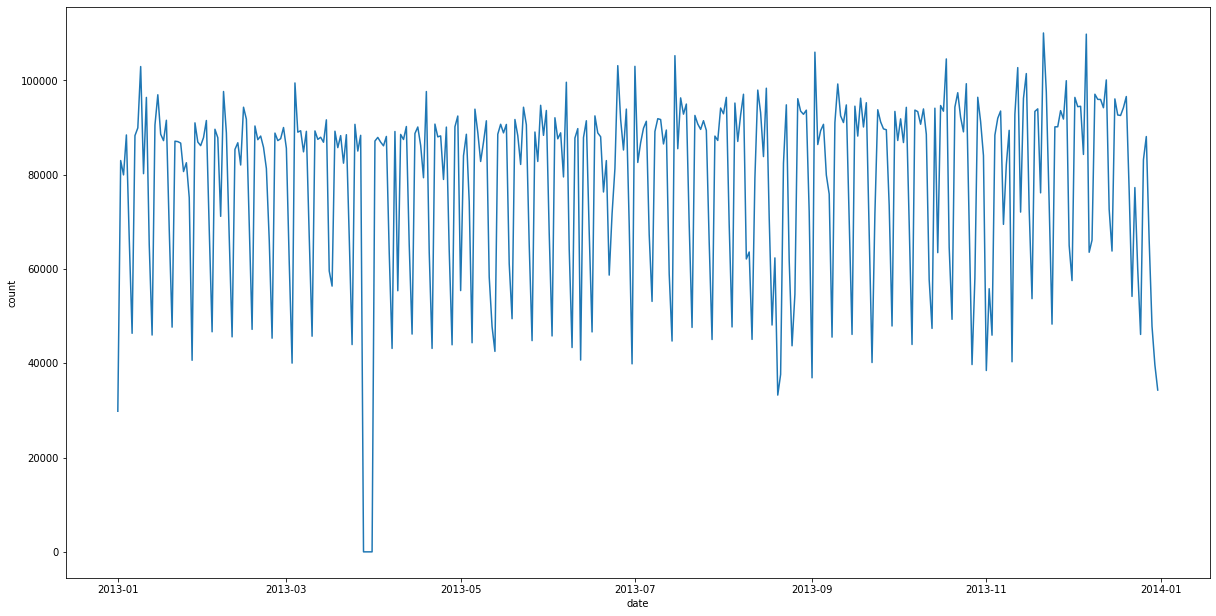

In [26]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))
nortave_plot = sns.lineplot(data=df_daily_total[(df_daily_total["station"] == "north_avenue") & 
                                                 (df_daily_total["gate"] == "entry")],
                            x="date", y="count")

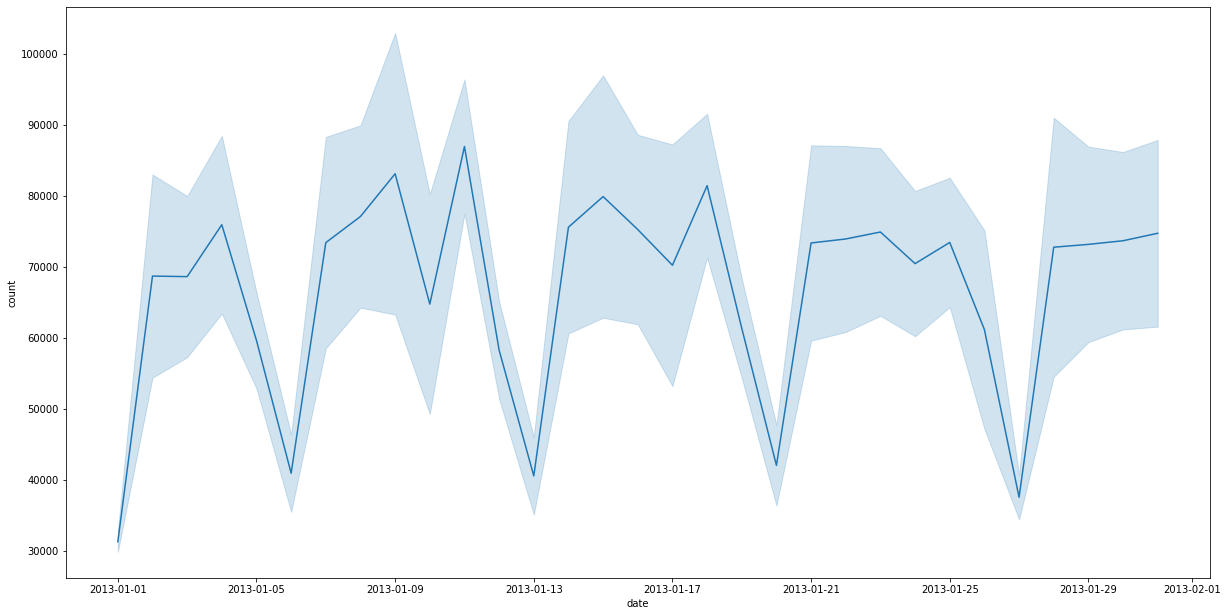

In [27]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))
nortave_plot = sns.lineplot(data=df_daily_total[(df_daily_total["station"] == "north_avenue") & 
                                                 (df_daily_total["month"] == 1)],
                            x="date", y="count")

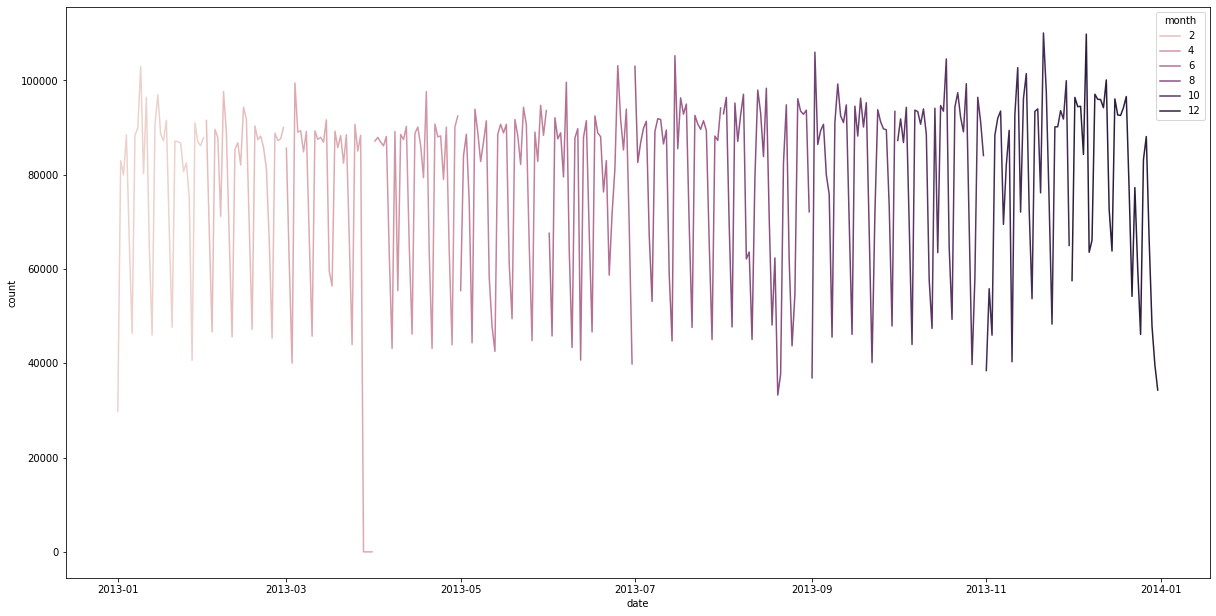

In [28]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))
nortave_plot = sns.lineplot(data=df_daily_total[(df_daily_total["station"] == "north_avenue") & 
                                                 (df_daily_total["gate"] == "entry")],
                            x="date", y="count", hue="month")

In [29]:
df_dow_total = df_tidy.groupby(["station", "gate", "month", "dow"], as_index=False)["count"].sum()
df_dow_total.head(10)

,station,gate,month,dow,count
0,ayala_avenue,entry,1,1,191445
1,ayala_avenue,entry,1,2,195898
2,ayala_avenue,entry,1,3,225400
3,ayala_avenue,entry,1,4,226074
4,ayala_avenue,entry,1,5,191907
5,ayala_avenue,entry,1,6,125400
6,ayala_avenue,entry,1,7,77305
7,ayala_avenue,entry,2,1,178609
8,ayala_avenue,entry,2,2,190908
9,ayala_avenue,entry,2,3,191996


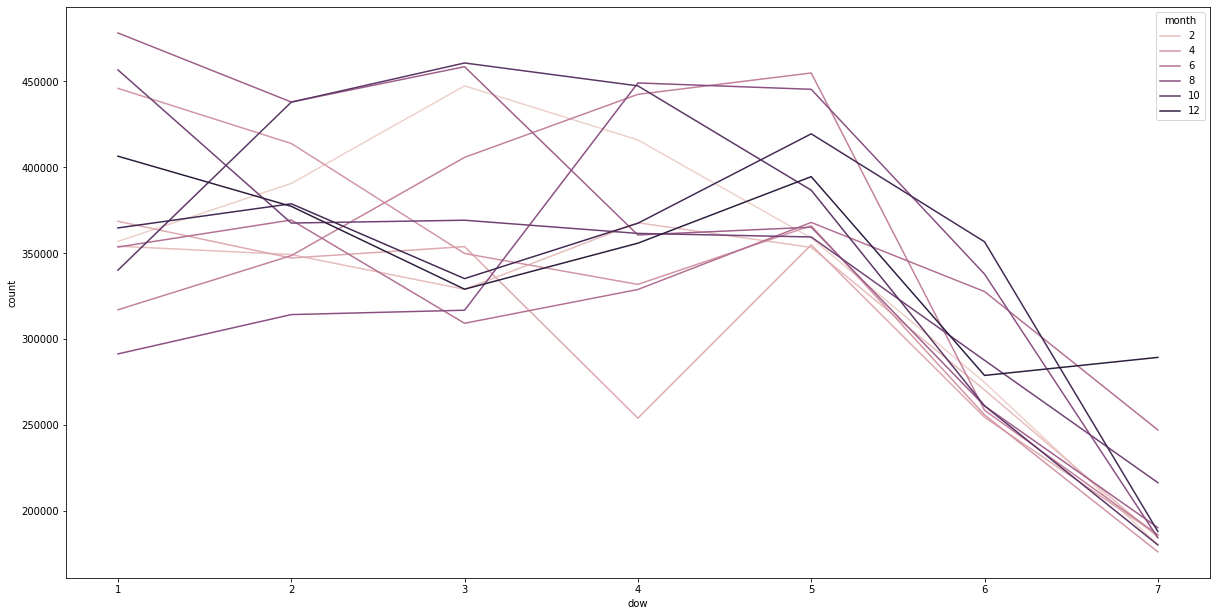

In [33]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))
nortave_plot = sns.lineplot(data=df_dow_total[(df_dow_total["station"] == "north_avenue") & 
                                                 (df_dow_total["gate"] == "entry")],
                            x="dow", y="count", hue="month")

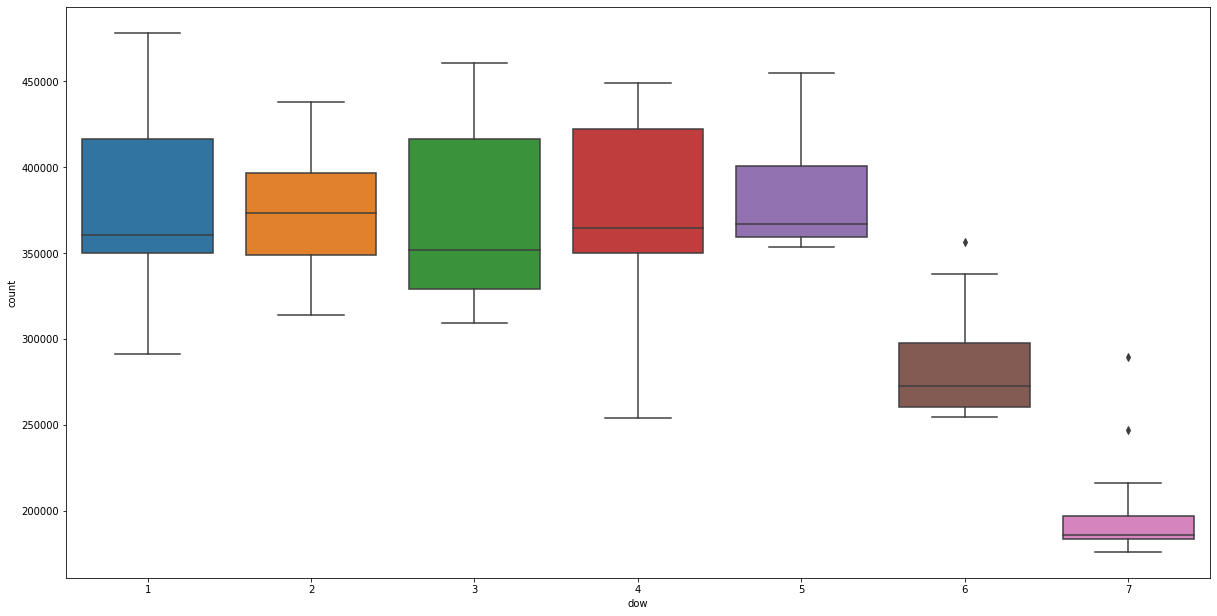

In [32]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))
nortave_plot = sns.boxplot(data=df_dow_total[(df_dow_total["station"] == "north_avenue") & 
                                                 (df_dow_total["gate"] == "entry")],
                            x="dow", y="count")